### Import the orginal Dataset, Then re run and and scaling and splitting in order to balancec and clean data

## Step 1, 2 

In [1]:
import pandas as pd
import numpy as np
import time
# Found Data Set
# Generally This dataset is about Econmic Freedoms in the world
df = pd.read_csv('efw_cc.csv')
dataframe_copy = df.copy()

In [2]:
dataframe_copy.loc[dataframe_copy['ECONOMIC FREEDOM'] > 5, 'Econ_Freedom_label'] = '1' # Economic Freedom is above 5
dataframe_copy.loc[dataframe_copy['ECONOMIC FREEDOM'] <= 5, 'Econ_Freedom_label'] = '0'# Economic Freedom is between 0 and 5

In [3]:
# I dropped all the rows that are NA in the Predicting categories label (Econ_Freedom_label)
dataframe_copy2 = dataframe_copy.dropna(subset = ["Econ_Freedom_label"], inplace=False)
print("\nOrginal Shape of DataFrame", df.shape, "\nShape of dataframe after dropping values that are NA after Categorizing predictor:", dataframe_copy2.shape)


Orginal Shape of DataFrame (3726, 36) 
Shape of dataframe after dropping values that are NA after Categorizing predictor: (3003, 37)


In [4]:
df

,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,8.0,...,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,2016,DZA,Algeria,4.99,159.0,4.0,2.150000,7.817129,0.0,4.5,...,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,2016,AGO,Angola,5.17,155.0,4.0,7.600000,8.886739,0.0,9.5,...,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,2016,ARG,Argentina,4.84,160.0,4.0,5.335294,6.048930,6.0,4.0,...,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,2016,ARM,Armenia,7.57,29.0,1.0,7.264706,7.748532,8.0,5.0,...,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,1970,VEN,Venezuela,7.18,10.0,1.0,6.602003,9.827430,7.0,NaN,...,9.713677,8.066667,NaN,10.00000,8.000000,8.688889,9.679680,NaN,NaN,5.312277
3722,1970,VNM,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3723,1970,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3724,1970,ZMB,Zambia,NaN,NaN,NaN,3.448131,9.105430,0.0,NaN,...,5.133689,NaN,NaN,0.00000,2.000000,NaN,7.327327,NaN,NaN,NaN


In [5]:
X = dataframe_copy2.drop(['ECONOMIC FREEDOM', 'Econ_Freedom_label', 'ISO_code', 'countries'], axis = 1)
y = dataframe_copy2.Econ_Freedom_label

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

X_array = X.to_numpy()
y_array = y.to_numpy()

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
split.get_n_splits(X_array, y_array)
print(split)
for train_index , test_index in split.split(X_array, y_array):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train = X_array[train_index]
    X_test = X_array[test_index]
    y_train = y_array[train_index]
    y_test = y_array[test_index]
    

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)


###### Notes
I kept this line of code in as kind of a default or check to make sure retest everything. 
``` from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print("\nTrain Value Spread\n", y_train.value_counts(),
"\nTest Value Spread\n", y_test.value_counts())```

###### Notes
I had to conver the array back to a dataframe in order to fill in the data missing values with the mean of the column. Take note here we're using the X_train as the way in which we fill in for X_test as well, in order to not create bias since we're not suppose to actually know what is going on with the testing dataset. 

In [7]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

In [8]:
dataframe_correlation = pd.concat([dataframe_copy['ECONOMIC FREEDOM'],X_train], axis = 1)

In [9]:
corr_matrix = dataframe_correlation.corr()
corr_matrix_specific = np.abs(corr_matrix['ECONOMIC FREEDOM'])
top_correlations = corr_matrix_specific.sort_values(ascending = False)

In [10]:
chosen_correlations = top_correlations['4_trade':'4b_regulatory_trade_barriers']

In [11]:
correlation_index = chosen_correlations.index
X_train_corr = X_train.loc[:,correlation_index]
X_test_corr = X_test.loc[:,correlation_index]

###### Notes 
I use again standard scaler as I did in project 1, in order to reduce the mean, I do this for two fold to cover potenital issues later on using SVM or Descision Trees, as well as it standardizes the data pretty well. 

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train_corr)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_corr),columns = X_train_corr.columns)  
X_test_scaled = pd.DataFrame(scaler.transform(X_test_corr),columns = X_test_corr.columns)

#print("\nShape of Training set:", X_train_scaled.shape, '\nShape of Testing Set:', X_test_scaled.shape)

In [13]:
X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()

###### Notes 
Double checking to make sure that the Null values are gone and that I am not going forward with these results with missing values still. 

In [14]:
X_train.isnull().sum()

4_trade                               0
3_sound_money                         0
4d_control_movement_capital_ppl       0
2c_protection_property_rights         0
2a_judicial_independence              0
3b_std_inflation                      0
4a_tariffs                            0
2j_gender_adjustment                  0
1d_top_marg_tax_rate                  0
2h_reliability_police                 0
5_regulation                          0
rank                                  0
2g_restrictions_sale_real_property    0
4c_black_market                       0
2f_legal_enforcement_contracts        0
1_size_government                     0
quartile                              0
3a_money_growth                       0
2b_impartial_courts                   0
2_property_rights                     0
3c_inflation                          0
1a_government_consumption             0
2i_business_costs_crime               0
4b_regulatory_trade_barriers          0
dtype: int64

In [15]:
#Re Labeling the predictor column names correctly 
y_train = pd.Series(y_train)
y_train = y_train.rename("Econ_Freedom_label")

y_test = pd.Series(y_test)
y_test = y_test.rename("Econ_Freedom_label")

### Step 3: 


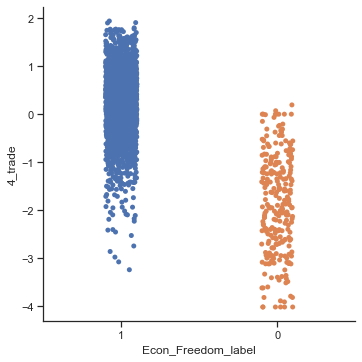

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 

training_set = pd.concat([X_train, y_train], axis = 1)
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="Econ_Freedom_label", y="4_trade", data=training_set);

#### This is clearly a categorical variable so it is either going to be I would consider this to binary, the distirbution based upon jus the training set it would appear that this is a binomial distribution just becasue of the fact that it is predicting either 0 or a 1. Later on if there were more variables to identify this would notion would change

###### Create csv files of the training data so i can just load this instead of loading everything for project 3. 

In [17]:
merged_Train = pd.concat([X_train, y_train], axis = 1)
merged_Test = pd.concat([X_test, y_test], axis = 1)

merged_Train.to_csv("Train_DF.csv", index = False)
merged_Test.to_csv("Test_DF.csv", index = False)

# Step 4: 

# KNN

##### I ran into some errors which wouldn't let me use f1 as a scorer, becasue it wasnt able to attribute the positive label aka yes or no of the prediction, So I modiified the F1 scorer to make it so that 1 is yes and 0 is no
###### 1 = greater than 5, 0 is less than or equal to 5. So in other words is the value above 5 Yes everythiing else no. 

#### Base

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

knn_base = KNeighborsClassifier()
knn_base.fit(X_train , y_train)
prediction = knn_base.predict(X_test)
training_predictioin = knn_base.predict(X_train)

print('\nKNN Optimized\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))


KNN Optimized


Train Accuracy:  0.9771024146544546

Test Accuracy:  0.9667221297836939

Test - No. Of Correct Predictions 581.0 / 601

Test Confusion Matrix:
[[ 49  15]
 [  5 532]]

Test Precision = 0.965638
Test Recall = 0.966722
Test F1 Score = 0.965466

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        64
           1       0.97      0.99      0.98       537

    accuracy                           0.97       601
   macro avg       0.94      0.88      0.91       601
weighted avg       0.97      0.97      0.97       601



#### Hyperparamater Tuning

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label= '1')
param_grid = {
    'metric':['manhattan', 'minkowski', 'euclidean'],
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, scoring = 'accuracy', cv = 5, n_jobs = 4, verbose = True)
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 656 tasks      | elapsed:    9.9s
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:   16.1s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['manhattan', 'minkowski', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=True)

#### Using CV = ``` StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)```

In [21]:
knn_best_params = grid_knn.best_params_
knn_results = pd.DataFrame(grid_knn.cv_results_)
worst_score = knn_results.loc[np.argmax(knn_results.rank_test_score)]
worst_score_params = worst_score.params
print("Best Score (accuracy): %f" % grid_knn.best_score_)
print("Optimal Hyperparameter Values: ", knn_best_params)
print("Worst Hyperparameter Valeus: ", worst_score_params)

Best Score (accuracy): 0.970023
Optimal Hyperparameter Values:  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Worst Hyperparameter Valeus:  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'uniform'}


#### Using CV = ```5```

In [22]:
knn_best_params = grid_knn.best_params_
knn_results = pd.DataFrame(grid_knn.cv_results_)
worst_score = knn_results.loc[np.argmax(knn_results.rank_test_score)]
worst_score_params = worst_score.params
print("Best Score (accuracy): %f" % grid_knn.best_score_)
print("Optimal Hyperparameter Values: ", knn_best_params)
print("Worst Hyperparameter Valeus: ", worst_score_params)

Best Score (accuracy): 0.970023
Optimal Hyperparameter Values:  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Worst Hyperparameter Valeus:  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'uniform'}


#### Optimized

###### Notes 
- It would seem that having a higher number of N_neighbors is a requriement, this could mean that the data is precise enough in order to make a good estimate, since with lower neighbors would mean that the data has either enough data to account for small chages or that the data is to spread out resulting in small differences from being notices. 
- Also there seems to be a discrpency when you change the type of folds being used. when using the folds where you use stratified CV, it produces the number of neighbors being lower at 8, although it produces a worse accuracy with 585/601 isntead of with just cv = 5 it makes 587 /601. 
    - I think that this is because the stratified make sure that each fold has enough of each value in order to decide and model the dataset. So compared to just splitting it into 5 chunks the prediction is going to be more realistic as well as better balanced which is why 8 was shown to be a better predictor. But becasue eerything is more balanced, the actual prediction is going to lose more since straight up 5 balance could've been able to show more things. 
    - To restate what was just said, equal balancing of the dataset allows for better ability for KNN to use less value for K becasue the dataset's model fit is closer to each other and is able to capture smaller differences, But the actual prediction is going to be lesser becasue it doesn't have the ability or the notion that it can predict outcomes that are not balanced which the test dataset was kind of made to represent.

In [23]:
knn2 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 8, weights = 'distance')
knn2.fit(X_train, y_train)
prediction = knn2.predict(X_test)
training_predictioin = knn2.predict(X_train)

print('\nKNN Optimized w/ CV = CV \n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))


KNN Optimized w/ CV = CV 


Train Accuracy:  1.0

Test Accuracy:  0.9733777038269551

Test - No. Of Correct Predictions 585.0 / 601

Test Confusion Matrix:
[[ 53  11]
 [  5 532]]

Test Precision = 0.972719
Test Recall = 0.973378
Test F1 Score = 0.972797

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        64
           1       0.98      0.99      0.99       537

    accuracy                           0.97       601
   macro avg       0.95      0.91      0.93       601
weighted avg       0.97      0.97      0.97       601



In [24]:
knn3 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 10, weights = 'distance')
knn3.fit(X_train, y_train)
prediction = knn3.predict(X_test)
training_predictioin = knn3.predict(X_train)

print('\nKNN Optimized w/ CV = 5\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))


KNN Optimized w/ CV = 5


Train Accuracy:  1.0

Test Accuracy:  0.9767054908485857

Test - No. Of Correct Predictions 587.0 / 601

Test Confusion Matrix:
[[ 52  12]
 [  2 535]]

Test Precision = 0.976454
Test Recall = 0.976705
Test F1 Score = 0.975826

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        64
           1       0.98      1.00      0.99       537

    accuracy                           0.98       601
   macro avg       0.97      0.90      0.93       601
weighted avg       0.98      0.98      0.98       601



# Logistic Regression

#### Base

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

logreg_base = LogisticRegression()
logreg_base.fit(X_train, y_train)
prediction = logreg_base.predict(X_test)
print("Training R^2 set score: {:.2f}".format(logreg_base.score(X_train, y_train)))
print("Test R^2 set score: {:.2f}".format(logreg_base.score(X_test, y_test)))

r2 = r2_score(y_test , prediction)
RMSE = mean_squared_error(y_test, prediction)
MAE = mean_absolute_error(y_test, prediction)
print("\nLogistic Regression Base")
print('\nR squared score:', r2, '\nRoot Mean Squared Error:', RMSE, '\nMean Absolute Error', MAE)

Training R^2 set score: 0.99
Test R^2 set score: 0.99

Logistic Regression Base

R squared score: 0.8426152234636871 
Root Mean Squared Error: 0.014975041597337771 
Mean Absolute Error 0.014975041597337771


#### Hyperparamater Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()

param_grid_log = {
        'penalty':['l1', 'l2', 'elasticnet', 'none'],
        'C': np.logspace(-4,4,20),
        'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 1000, 2500, 5000]
    }



log_grid = GridSearchCV(logreg, param_grid = param_grid_log, scoring = 'neg_root_mean_squared_error', verbose = True, cv=5, n_jobs=4)
log_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 328 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:   31.2s
[Parallel(n_jobs=4)]: Done 2896 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 4212 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 5430 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 6676 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 8000 out of 8000 | elapsed:  5.5min finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='neg_root_mean_squared_error', verbose=True)

#### Printing out the Best + Worst Performing Paramaters

In [27]:
log_best_params = log_grid.best_params_
log_results = pd.DataFrame(log_grid.cv_results_)
worst_score = log_results.loc[np.argmax(log_results.rank_test_score)]
worst_score_params = worst_score.params
print("Best Score (neg_root_mean_squared_error): %f" % log_grid.best_score_)
print("Optimal Hyperparameter Values: ", log_best_params)
print("Worst Hyperparameter Valeus: ", worst_score_params)

Best Score (neg_root_mean_squared_error): -0.095905
Optimal Hyperparameter Values:  {'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Worst Hyperparameter Valeus:  {'C': 0.0001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'lbfgs'}


#### Evaluating the hyperparamater tuning on test data

In [28]:
logreg2 = LogisticRegression(C = 0.23357214690901212, max_iter = 1000, penalty = 'l2', solver = 'saga')
logreg2.fit(X_train , y_train)
prediction = logreg2.predict(X_test)
print("Training R^2 set score: {:.2f}".format(logreg2.score(X_train, y_train)))
print("Test R^2 set score: {:.2f}".format(logreg2.score(X_test, y_test)))

r2 = r2_score(y_test , prediction)
RMSE = mean_squared_error(y_test, prediction)
MAE = mean_absolute_error(y_test, prediction)

print("\nLogistic Regression Optimized")
print('\nR squared score:', r2, '\nRoot Mean Squared Error:', RMSE, '\nMean Absolute Error', MAE)

Training R^2 set score: 0.99
Test R^2 set score: 0.99

Logistic Regression Optimized

R squared score: 0.8426152234636871 
Root Mean Squared Error: 0.014975041597337771 
Mean Absolute Error 0.014975041597337771


# Support Vector Machines

#### Base

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

svm_base = SVC().fit(X_train, y_train)


prediction = svm_base.predict(X_test)
training_predictioin = svm_base.predict(X_train)

print('\nSVM Base\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))


SVM Base


Train Accuracy:  0.9912572855953372

Test Accuracy:  0.978369384359401

Test - No. Of Correct Predictions 588.0 / 601

Test Confusion Matrix:
[[ 53  11]
 [  2 535]]

Test Precision = 0.978127
Test Recall = 0.978369
Test F1 Score = 0.977641

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        64
           1       0.98      1.00      0.99       537

    accuracy                           0.98       601
   macro avg       0.97      0.91      0.94       601
weighted avg       0.98      0.98      0.98       601



#### Hyperparamater Tuning

#### First Hyper Paramter tuning 

In [30]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [31]:
param_grid = {
    'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'kernel':['linear', 'poly', 'rbf', 'sigmmoid'],
    'gamma':[0.5, 1, 5, 10 ,50, 100, 500, 1000]
}

svm = SVC()
grid_svm = GridSearchCV(svm, param_grid , scoring = 'accuracy', cv = cv, n_jobs = 4)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'gamma': [0.5, 1, 5, 10, 50, 100, 500, 1000],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmmoid']},
             scoring='accuracy')

In [32]:
svm_best_params = grid_svm.best_params_
svm_results = pd.DataFrame(grid_svm.cv_results_)
worst_score = svm_results.loc[np.argmax(svm_results.rank_test_score)]
worst_score_params = worst_score.params
print("Best Score (accuracy): %f" % grid_svm.best_score_)
print("Optimal Hyperparameter Values: ", svm_best_params)
print("Worst Hyperparameter Valeus: ", worst_score_params)

Best Score (accuracy): 0.988358
Optimal Hyperparameter Values:  {'C': 0.8, 'gamma': 0.5, 'kernel': 'linear'}
Worst Hyperparameter Valeus:  {'C': 0.9, 'gamma': 1000, 'kernel': 'sigmmoid'}


###### Notes 
Since I saw some differences between the scores using cv = the stratified split vs just 5 I test that here looking for the most accurate. 

In [33]:
param_grid = {
    'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'kernel':['linear', 'poly', 'rbf', 'sigmmoid'],
    'gamma':[0.5, 1, 5, 10 ,50, 100, 500, 1000]
}

svm = SVC()
grid_svm = GridSearchCV(svm, param_grid , scoring = 'accuracy', cv = 5, n_jobs = 4)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'gamma': [0.5, 1, 5, 10, 50, 100, 500, 1000],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmmoid']},
             scoring='accuracy')

In [34]:
svm_best_params = grid_svm.best_params_
svm_results = pd.DataFrame(grid_svm.cv_results_)
worst_score = svm_results.loc[np.argmax(svm_results.rank_test_score)]
worst_score_params = worst_score.params
print("Best Score (accuracy): %f" % grid_svm.best_score_)
print("Optimal Hyperparameter Values: ", svm_best_params)
print("Worst Hyperparameter Valeus: ", worst_score_params)

Best Score (accuracy): 0.990424
Optimal Hyperparameter Values:  {'C': 0.7, 'gamma': 0.5, 'kernel': 'linear'}
Worst Hyperparameter Valeus:  {'C': 0.9, 'gamma': 1000, 'kernel': 'sigmmoid'}


In [35]:
svm2 = SVC(C = 0.8, gamma = 0.5, kernel = 'linear')
svm2.fit(X_train, y_train)
prediction = svm2.predict(X_test)
training_predictioin = svm2.predict(X_train)

print('\nSVM Optimized w/ CV = CV\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))


SVM Optimized w/ CV = CV


Train Accuracy:  0.9933388842631141

Test Accuracy:  0.9900166389351082

Test - No. Of Correct Predictions 595.0 / 601

Test Confusion Matrix:
[[ 59   5]
 [  1 536]]

Test Precision = 0.989967
Test Recall = 0.990017
Test F1 Score = 0.989874

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.99      1.00      0.99       537

    accuracy                           0.99       601
   macro avg       0.99      0.96      0.97       601
weighted avg       0.99      0.99      0.99       601



In [36]:
svm2 = SVC(C = 0.7, gamma = 0.5, kernel = 'linear')
svm2.fit(X_train, y_train)
prediction = svm2.predict(X_test)
training_predictioin = svm2.predict(X_train)

print('\nSVM Optimized w/ CV = 5\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))


SVM Optimized w/ CV = 5


Train Accuracy:  0.9933388842631141

Test Accuracy:  0.9900166389351082

Test - No. Of Correct Predictions 595.0 / 601

Test Confusion Matrix:
[[ 59   5]
 [  1 536]]

Test Precision = 0.989967
Test Recall = 0.990017
Test F1 Score = 0.989874

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.99      1.00      0.99       537

    accuracy                           0.99       601
   macro avg       0.99      0.96      0.97       601
weighted avg       0.99      0.99      0.99       601



###### Notes 
As it appears there isn't as much of a descrpency between using CV = the stratified shulffle and cv = 5

# Want to look at potentially some changes using SVM. Maybe expand the gamma and c to be 0 - 1 with 0.01 intervals. and look and see the changes 

###### Looking at the grid search with cv = cv stratified.

In [37]:
C_range = np.arange(0, 1, 0.01)
param_grid = dict(C=C_range)
svm_test = SVC(kernel = 'linear', gamma = 0.5)
grid_test_svm = GridSearchCV(svm_test, param_grid, scoring = 'accuracy', cv = cv, n_jobs = 4)
grid_test_svm.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(gamma=0.5, kernel='linear'), n_jobs=4,
             param_grid={'C': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             scoring='accuracy')

In [38]:
svm_best_params = grid_test_svm.best_params_
svm_results = pd.DataFrame(grid_test_svm.cv_results_)
worst_score = svm_results.loc[np.argmax(svm_results.rank_test_score)]
worst_score_params = worst_score.params
print("Best Score (accuracy): %f" % grid_test_svm.best_score_)
print("Optimal Hyperparameter Values: ", svm_best_params)
print("Worst Hyperparameter Valeus: ", worst_score_params)

Best Score (accuracy): 0.989189
Optimal Hyperparameter Values:  {'C': 0.9400000000000001}
Worst Hyperparameter Valeus:  {'C': 0.0}


###### Looking at gridsearch with cv = 5

In [39]:
C_range = np.arange(0, 1, 0.01)
param_grid = dict(C=C_range)
svm_test = SVC(kernel = 'linear', gamma = 0.5)
grid_test_svm = GridSearchCV(svm_test, param_grid, scoring = 'accuracy', cv = 5, n_jobs = 4)
grid_test_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma=0.5, kernel='linear'), n_jobs=4,
             param_grid={'C': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             scoring='accuracy')

In [40]:
svm_best_params = grid_test_svm.best_params_
svm_results = pd.DataFrame(grid_test_svm.cv_results_)
worst_score = svm_results.loc[np.argmax(svm_results.rank_test_score)]
worst_score_params = worst_score.params
print("Best Score (accuracy): %f" % grid_test_svm.best_score_)
print("Optimal Hyperparameter Values: ", svm_best_params)
print("Worst Hyperparameter Valeus: ", worst_score_params)

Best Score (accuracy): 0.990840
Optimal Hyperparameter Values:  {'C': 0.68}
Worst Hyperparameter Valeus:  {'C': 0.0}


In [41]:
svm3 = SVC(C = 0.9400000000000001, gamma = 0.5, kernel = 'linear')
svm3.fit(X_train, y_train)
prediction = svm3.predict(X_test)
training_predictioin = svm3.predict(X_train)

print('\nSVM Optimized w/ CV = CV\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))


SVM Optimized w/ CV = CV


Train Accuracy:  0.9937552039966694

Test Accuracy:  0.9916805324459235

Test - No. Of Correct Predictions 596.0 / 601

Test Confusion Matrix:
[[ 60   4]
 [  1 536]]

Test Precision = 0.991636
Test Recall = 0.991681
Test F1 Score = 0.991592

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        64
           1       0.99      1.00      1.00       537

    accuracy                           0.99       601
   macro avg       0.99      0.97      0.98       601
weighted avg       0.99      0.99      0.99       601



In [42]:
svm3 = SVC(C =  0.68, gamma = 0.5, kernel = 'linear')
svm3.fit(X_train, y_train)
prediction = svm3.predict(X_test)
training_predictioin = svm3.predict(X_train)

print('\nSVM Optimized w/ CV = 5\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))


SVM Optimized w/ CV = 5


Train Accuracy:  0.9937552039966694

Test Accuracy:  0.9900166389351082

Test - No. Of Correct Predictions 595.0 / 601

Test Confusion Matrix:
[[ 59   5]
 [  1 536]]

Test Precision = 0.989967
Test Recall = 0.990017
Test F1 Score = 0.989874

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.99      1.00      0.99       537

    accuracy                           0.99       601
   macro avg       0.99      0.96      0.97       601
weighted avg       0.99      0.99      0.99       601



###### Notes 
So it would appear specifically with this case that the stratified dataset is better sutited to produce these kinds of results compared to using it with KNN. I think this could be due to how specifically the prediction is met, SVM utilizes the Linear kernel, while for KNN its the distance between everything. 

#### No real change in F1 or even accuracy between the hyperparamter scaling. 
Default SVC 
- Gamma = "Scale" 
    - this is equal to 1/(number of features * X.varriance) 
- Kernal = rbf
- C = 1.0 


Hyperparamaters 


- Gamma = 0.4
- Kernal = Linear
- C = 0.4 
